# Introduction

We have given data set for Stock Market Prediction And Forecasting Using Stacked LSTM.

Here, we have forcasted 30 days Stock market price using stacked LSTM nethod. 
Dataset link:https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

# Load The Datsset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
URL="https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
data = pd.read_csv(URL) 
data=data.iloc[::-1]
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [2]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


# Analyze and Visualize Dataset

In [3]:
data.shape

(2035, 8)

In [ ]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [4]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
data1=data.reset_index()['Close']
data1

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

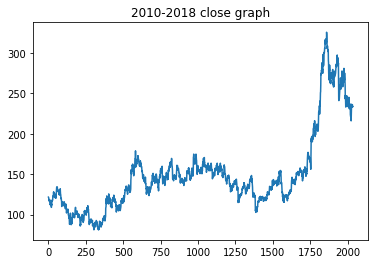

In [6]:
plt.plot(data1);
plt.title("2010-2018 close graph");

We can see the variation in the close value in the last Eight years.

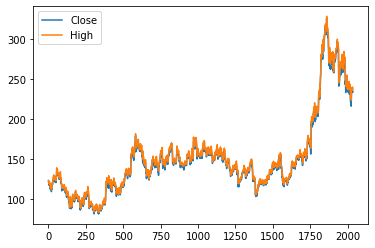

In [7]:
data2=data.reset_index()['High']
plt.plot(data1)
plt.plot(data2)
plt.legend(['Close','High'])

The above graph shows the highest range of the price and the range at which it gets close.  so, we can see there in not much difference in the high and the close value.

# Train and Split

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))
data1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [9]:
training_size=int(len(data1)*0.70)
test_size=len(data1)-training_size
train_data , test_data = data1[0:training_size,:]  ,  data1[training_size:len(data1),:1]

In [10]:
train_data.size, test_data.size, data.shape[0]

(1424, 611, 2035)

In [11]:
def create_dataset(dataset, time_step=1):
  datax, datay=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    datax.append(a)
    datay.append(dataset[i+time_step,0])
  return np.array(datax), np.array(datay)
time_step = 100
train_x, train_y = create_dataset(train_data,time_step)
test_x,  test_y  = create_dataset(test_data,time_step)

In [12]:
train_x=train_x.reshape(train_x.shape[0],train_x.shape[1],1)
test_x= test_x.reshape(test_x.shape[0],test_x.shape[1],1)
train_x.shape,test_x.shape

((1323, 100, 1), (510, 100, 1))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [14]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=100,batch_size=64,verbose=1)

#verbose basically means logs. It accepts values as 0/1. If you put Verbose value as 1 in ModelCheckPoint callback, after every epoch you
#will get a statement like Model improved from error 456 to 123 or model did not improve in this epoch.

Epoch 1/100
21/21 [==============================] - 10s 223ms/step - loss: 0.0091 - val_loss: 0.0175
Epoch 2/100
21/21 [==============================] - 3s 162ms/step - loss: 0.0018 - val_loss: 0.0044
Epoch 3/100
21/21 [==============================] - 3s 160ms/step - loss: 9.4434e-04 - val_loss: 0.0031
Epoch 4/100
21/21 [==============================] - 3s 162ms/step - loss: 8.7022e-04 - val_loss: 0.0042
Epoch 5/100
21/21 [==============================] - 3s 160ms/step - loss: 8.2609e-04 - val_loss: 0.0036
Epoch 6/100
21/21 [==============================] - 3s 160ms/step - loss: 7.9344e-04 - val_loss: 0.0030
Epoch 7/100
21/21 [==============================] - 3s 160ms/step - loss: 7.6247e-04 - val_loss: 0.0032
Epoch 8/100
21/21 [==============================] - 3s 161ms/step - loss: 7.5844e-04 - val_loss: 0.0027
Epoch 9/100
21/21 [==============================] - 3s 160ms/step - loss: 6.9292e-04 - val_loss: 0.0029
Epoch 10/100
21/21 [==============================] - 3s 161ms

From above statements we can observe where the stock price get into loss.

In [16]:
train_predict=model.predict(train_x)
test_predict=model.predict(test_x)

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [17]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_y,train_predict))

78.9543300413196

In [18]:
math.sqrt(mean_squared_error(test_y,test_predict))

76.94935012111613

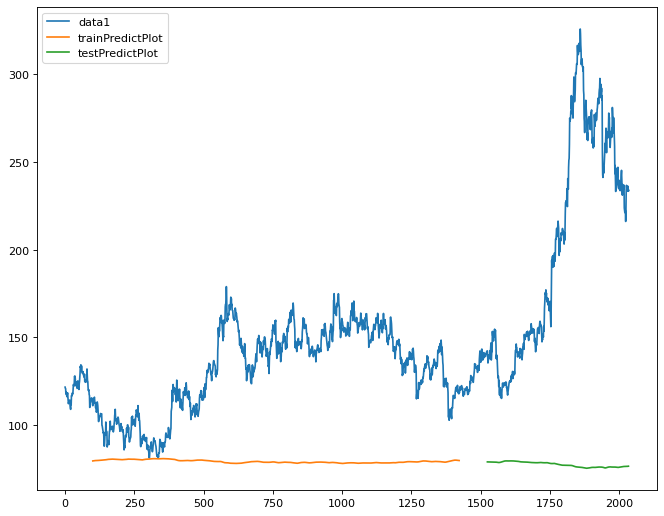

In [19]:
from matplotlib.pyplot import figure
look_back=100
trainPredictPlot = np.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(data1)                    # shift test predictions for plotting
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict

figure(figsize=(10, 8), dpi=80)
plt.plot(scaler.inverse_transform(data1))                   # plot baseline and predictions
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['data1','trainPredictPlot','testPredictPlot'])
plt.show()


In [20]:
len(test_data)

611

In [21]:
x_input=test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [22]:
#tolist(), used to convert the data elements of an array into a list.
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

Now, lets forcast the next 30 days of stock price.

In [23]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):                            #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))           #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]                     #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[-0.01820285]
101
1 day input [ 0.86213235  0.83455882  0.84375     0.71466503  0.66053922  0.65420752
  0.68035131  0.6689134   0.66421569  0.67892157  0.69138072  0.70894608
  0.72263072  0.73406863  0.72120098  0.74979575  0.7689951   0.74468954
  0.7120098   0.74673203  0.75490196  0.76041667  0.75980392  0.74652778
  0.76245915  0.77062908  0.80412582  0.78104575  0.79411765  0.76021242
  0.73488562  0.72406046  0.73999183  0.74979575  0.76143791  0.75428922
  0.74754902  0.76960784  0.7495915   0.81719771  0.80208333  0.77736928
  0.75714869  0.79370915  0.79166667  0.77144608  0.75265523  0.72691993
  0.6629902   0.68198529  0.64419935  0.62152778  0.6439951   0.66319444
  0.67544935  0.63705065  0.64603758  0.65890523  0.65870098  0.67790033
  0.63194444  0.63112745  0.62785948  0.64767157  0.63991013  0.63480392
  0.63868464  0.62336601  0.62745098  0.63970588  0.64705882  0.66196895
  0.67075163  0.65196078  0.63112745  0.61294935  0.6376634   0.62254902
  0.62745098  0.63337

In [24]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [25]:
len(data)-100

1935

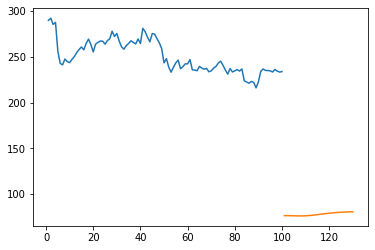

In [26]:
plt.plot(day_new,scaler.inverse_transform(data1[1935:]));
plt.plot(day_pred,scaler.inverse_transform(lst_output));

We can clearly observe the forcasted value in the above graph which is orange in color.

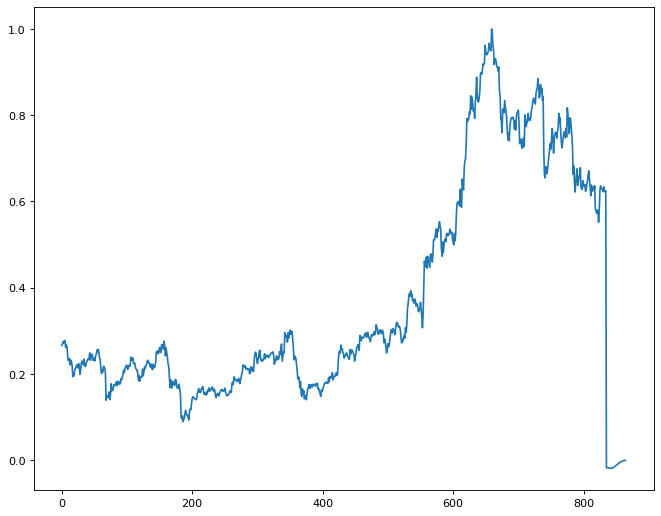

In [27]:
figure(figsize=(10, 8), dpi=80)
df3=data1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:]);

Thank you